# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

#Data Validation

In [34]:
 # Read data from 'product_sales.csv' into a DataFrame

import pandas as pd
df = pd.read_csv('product_sales.csv')
df


week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]

In [35]:
#Counting Missing Values in each column
df.shape #(15000, 8)
df.isna().sum()    #revenue              1074
df.head()

#Removing missing values
df.dropna(inplace = True)
df.isna().sum() 


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [36]:
""""
# Displaying unique values in specific columns

print(df['sales_method'].unique())
print(df['state'].unique())
print(df['week'].unique())
print(df['customer_id'].unique())
print(df['nb_site_visits'].unique())

"""
print("Hello")

Hello


In [37]:
df.shape


(13926, 8)

In [38]:
#Checking for duplicate
duplicate_ids = df[df.duplicated('customer_id', keep=False)]
print(duplicate_ids)

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [39]:
df

week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13926 rows x 8 columns]

In [40]:
# Renaming values in the 'sales_method' column for consistency
df.loc[df.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method == 'email', 'sales_method'] = 'Email'
#df.shape
# Provides information about the DataFrame after changing values, including data types and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [41]:
# Counting values in the 'years_as_customer' column and sorting by index
print(df)
# Counting values in the 'years_as_customer' column and sorting by index

year_counts = df['years_as_customer'].value_counts().sort_index()
print(year_counts)
df['years_as_customer'].value_counts().sort_index()

       week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13926 rows x 8 columns]
0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36


0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

In [42]:
# Check number of years since the founding year (1984) and remove outliers
# Assuming the current year is 2023, Years_since_1984 = Current_year - 1984 = 39

# Filtering rows where 'years_as_customer' is greater than 40 (considering outliers)

df[df['years_as_customer'] > 40]
# Dropping rows where 'years_as_customer' is greater than 40

df.drop(df[df['years_as_customer'] > 40].index, axis=0, inplace=True)
df['years_as_customer'].value_counts().sort_index()
#df[df['years_as_customer'] > 40]

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
Name: years_as_customer, dtype: int64

In [43]:
# Counting the occurrences of each unique value in the 'state' column and sorting by index
# Counting the number of unique values in the 'state' column

df['state'].value_counts().sort_index()
df['state'].nunique()
df.head()

week  sales_method  ... nb_site_visits        state
1     6  Email + Call  ...             28       Kansas
2     5          Call  ...             26    Wisconsin
4     3         Email  ...             28     Illinois
5     6          Call  ...             24  Mississippi
6     4         Email  ...             28      Georgia

[5 rows x 8 columns]

In [44]:
# Displaying the data types of each column in the DataFrame
df.dtypes
# Counting the number of missing values in each column of the DataFrame
df.isnull().sum()
# Displaying unique values in the 'sales_method' column of the DataFrame
df['sales_method'].unique()

array(['Email + Call', 'Call', 'Email'], dtype=object)

In [45]:
# Check if all values in the 'customer_id' column are strings
all_strings = df['customer_id'].apply(lambda x: isinstance(x, str)).all()

# Check if all strings in the 'customer_id' column have a length of 36 characters
correct_length = df['customer_id'].apply(lambda x: len(x) == 36).all()

# Output the results of both checks
all_strings, correct_length

(True, True)

In [46]:
# Check if all values in both 'revenue' and 'sales' columns are greater than or equal to zero
(df['nb_sold'] >= 0).all()
(df['revenue'] >= 0).all()


True

In [47]:
# Check if all values in both 'revenue' and 'sales' columns are greater than or equal to zero

(df['revenue'] >= 0).all()

True

In [48]:
#df['nb_sold'] >= 0).all()
# Check if all 'years_as_customer' values are non-negative
df['years_as_customer'].min()
# Calculate the years as a customer for each entry and check if they are greater than the founding year
df['years_as_customer'].max()

39

In [49]:
# Counting the number of missing (null) values in the 'nb_site_visits' column
df['nb_site_visits'].isnull().sum()
# Finding the minimum value in the 'nb_site_visits' column (Must be positive)
df['nb_site_visits'].min()
# Checking if it contains outlier by finding the maximum value in the 'nb_site_visits' column
df['nb_site_visits'].max()


37

In [50]:
# Convert entries in the 'state' column to uppercase and display unique values
unique_states_uppercase = df['state'].str.upper().unique()

# Outputting the unique values after converting to uppercase
unique_states_uppercase

array(['KANSAS', 'WISCONSIN', 'ILLINOIS', 'MISSISSIPPI', 'GEORGIA',
       'OKLAHOMA', 'MASSACHUSETTS', 'MISSOURI', 'TEXAS', 'NEW YORK',
       'MARYLAND', 'CALIFORNIA', 'TENNESSEE', 'NORTH DAKOTA', 'FLORIDA',
       'MICHIGAN', 'NORTH CAROLINA', 'PENNSYLVANIA', 'INDIANA', 'HAWAII',
       'COLORADO', 'LOUISIANA', 'VIRGINIA', 'ARKANSAS', 'ALASKA',
       'OREGON', 'NEW HAMPSHIRE', 'OHIO', 'NEW JERSEY', 'CONNECTICUT',
       'IOWA', 'MONTANA', 'WASHINGTON', 'ARIZONA', 'KENTUCKY', 'ALABAMA',
       'NEBRASKA', 'SOUTH CAROLINA', 'MINNESOTA', 'SOUTH DAKOTA', 'MAINE',
       'UTAH', 'WEST VIRGINIA', 'VERMONT', 'NEW MEXICO', 'RHODE ISLAND',
       'NEVADA', 'DELAWARE', 'IDAHO', 'WYOMING'], dtype=object)

In [51]:
# Check the dimensions of the DataFrame after cleaning or preprocessing
data_dimensions = df.shape

# Output the number of rows and columns in the DataFrame

1. Initial Data Overview
Records: 15,000
2. Cleaning Steps
Handling Missing Values:
Missing Values: Revenue had 1,074 missing entries.
Action: Removed rows with missing revenue entries.
Result: Cleaned dataset with 13,926 records.
Validation by Columns:
Column Types: Checked for correct data types.
Customer ID: Verified all entries are strings of 36 characters.
Sales Method: Unified naming for consistency.
Outlier Handling:
Years as Customer: Detected outliers >38 years, removed these entries.
Unique Values:
State & Sales Method: Checked unique values for consistency.
3. Summary
Data Size: Reduced from 15,000 to 13,926 records.
Missing Values: Cleaned for further analysis.
Outliers: Identified and removed to refine data integrity.



In [52]:
#Exploratory Analysis

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df['sales_method'].value_counts()

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

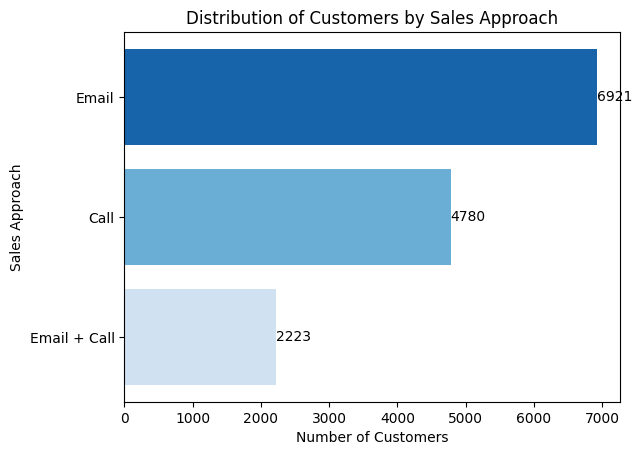

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique sales methods and their counts
sales_method_counts = df['sales_method'].value_counts().sort_values()

# Define shades of blue for each sales method
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(sales_method_counts)))

# Plotting number of customers for each sales approach using a horizontal bar chart with different shades of blue
bars = plt.barh(sales_method_counts.index, sales_method_counts, color=colors)

# Set the number of customers on each bar
for bar, count in zip(bars, sales_method_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, count, ha='left', va='center', color='black')

# Set the title and labels for the plot
plt.title("Distribution of Customers by Sales Approach")
plt.xlabel("Number of Customers")
plt.ylabel("Sales Approach")

plt.show()


The graph illustrates the distribution of sales approaches, revealing that the highest number of sales were made through email (6,921), followed by call (4,780), and email + call (2,223), respectively. Specific labels on each bar provide a clear representation, facilitating a quick analysis and comparison of the differing amounts.

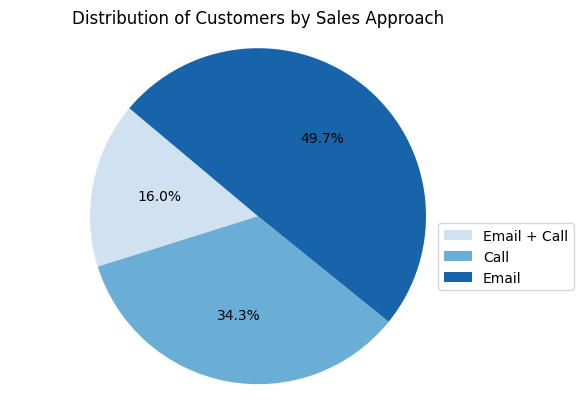

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique sales methods and their counts
sales_method_counts = df['sales_method'].value_counts().sort_values()

# Define shades of blue for each sales method
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(sales_method_counts)))

# Plotting number of customers for each sales approach using a pie chart with different shades of blue
plt.pie(sales_method_counts, labels=[''] * len(sales_method_counts), autopct='%1.1f%%', colors=colors, startangle=140)

# Displaying the legend on the right side with labels
plt.legend(sales_method_counts.index, loc="upper center", bbox_to_anchor=(1, 0.5))

# Set the title for the plot
plt.title("Distribution of Customers by Sales Approach")

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


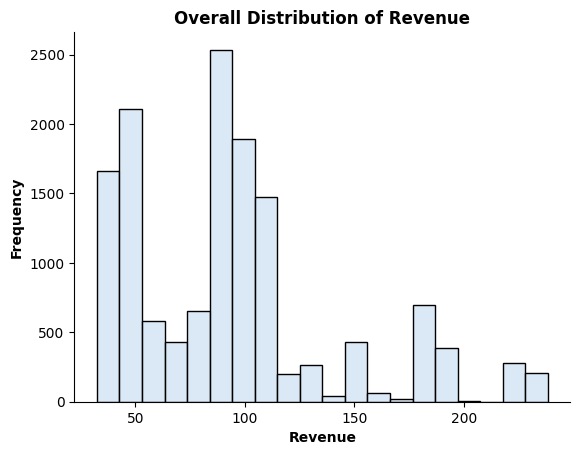

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a histogram to visualize the overall spread of revenue
def hist_plot(data, x_arg, title, x_label, y_label, bin_size):
    sns.histplot(data=data, x=x_arg, bins=bin_size)
    
    # Set plot title and axis labels
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
    sns.despine()
    plt.show()

# Calling the function to plot the histogram for revenue distribution
hist_plot(data=df, x_arg='revenue', title='Overall Distribution of Revenue',
          x_label='Revenue', y_label='Frequency', bin_size=20)


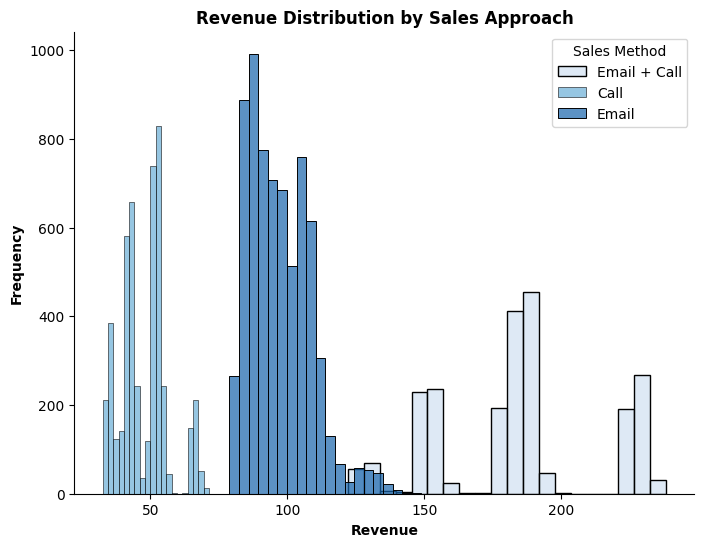

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating histograms to visualize the distribution of revenue for each sales approach
def hist_plot_by_sales_method(data, sales_method, x_arg, title, x_label, y_label, bin_size, color_palette):
    sns.set_palette(color_palette)
    plt.figure(figsize=(8, 6))
    
    for method in sales_method:
        sns.histplot(data=data[data['sales_method'] == method], x=x_arg, bins=bin_size, label=method, alpha=0.7)
    
    # Set plot title and axis labels
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
    plt.legend(title='Sales Method')
    sns.despine()
    plt.show()

# List of unique sales methods
sales_methods = df['sales_method'].unique()

# Defining the color palette
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(sales_methods)))

# Calling the function to plot histograms for revenue distribution by sales approach
hist_plot_by_sales_method(data=df, sales_method=sales_methods, x_arg='revenue',
                          title='Revenue Distribution by Sales Approach',
                          x_label='Revenue', y_label='Frequency', bin_size=20,
                          color_palette=colors)


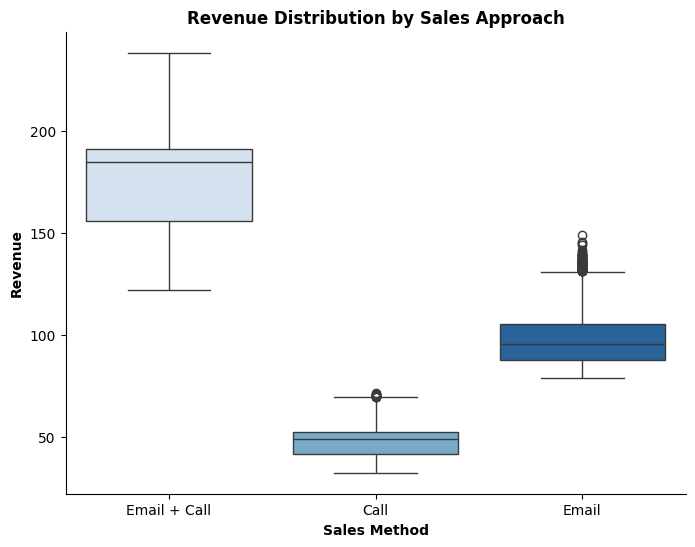

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating boxplots to visualize the distribution of revenue for each sales approach
def box_plot_by_sales_method(data, x_arg, y_arg, title, x_label, y_label, color_palette):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=x_arg, y=y_arg, palette=color_palette)
    
    # Set plot title and axis labels
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
    sns.despine()
    plt.show()

# Defining the color palette
sales_methods = df['sales_method'].unique()
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(sales_methods)))

# Calling the function to plot boxplots for revenue distribution by sales approach
box_plot_by_sales_method(data=df, x_arg='sales_method', y_arg='revenue',
                         title='Revenue Distribution by Sales Approach',
                         x_label='Sales Method', y_label='Revenue',
                         color_palette=colors)


In [60]:
import pandas as pd

# Group data by sales approach and calculate descriptive statistics
sales_stats = df.groupby('sales_method')['revenue'].agg(['min', 'max', 'mean', 'median'])

# Display the statistics
print(sales_stats)


                 min     max        mean  median
sales_method                                    
Call           32.54   71.36   47.596866   49.05
Email          78.83  148.97   97.127671   95.58
Email + Call  122.11  238.32  183.651233  184.74


It's evident that the "Call" sales method exhibited the narrowest range of revenue amounts, fluctuating between approximately 40 to 70. This narrow range underscores the comparatively lower productivity of the "Call" approach, contributing only a minor percentage to the total revenue. The visualization vividly illustrates why "Call" sales comprised such a marginal portion of the overall revenue, as opposed to the broader revenue ranges seen in other methods.
It's apparent that "Calls" accounted for the smallest share of revenue, constituting roughly 18% of the total revenue during the observed period. In contrast, "Email + Call" contributed around 31% of the revenue, whereas "Email" emerged as the most dominant revenue generator, attributing to approximately 53% of the total revenue. The revenue distribution across these methods is distinctly showcased in the accompanying charts.







       week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]


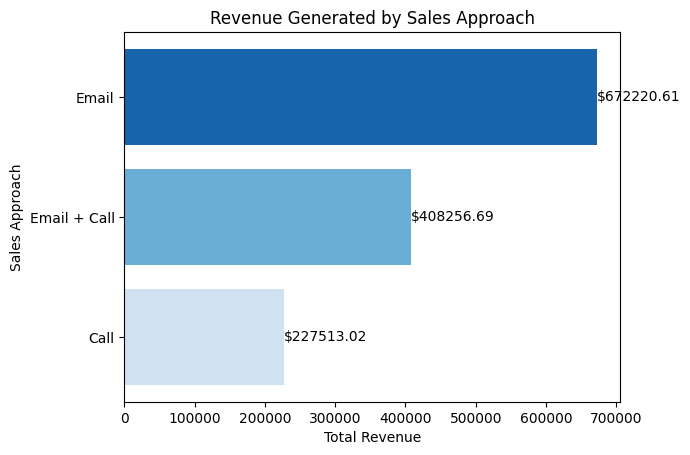

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df)
# Get revenue by each sales approach
revenue_by_method = df.groupby('sales_method')['revenue'].sum().sort_values()

# Define shades of blue for each sales method
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(revenue_by_method)))

# Plotting revenue generated by each sales approach using a horizontal bar chart
bars = plt.barh(revenue_by_method.index, revenue_by_method, color=colors)

# Set the revenue amount on each bar
for bar, revenue in zip(bars, revenue_by_method):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${revenue:.2f}", ha='left', va='center', color='black')

# Set the title and labels for the plot
plt.title("Revenue Generated by Sales Approach")
plt.xlabel("Total Revenue")
plt.ylabel("Sales Approach")

plt.show()



The combined revenue from distinct sales methods is: Email generated $67,220.61, Email + Call contributed $408,256.69, and the Call method yielded $227,513.02 in total revenue.

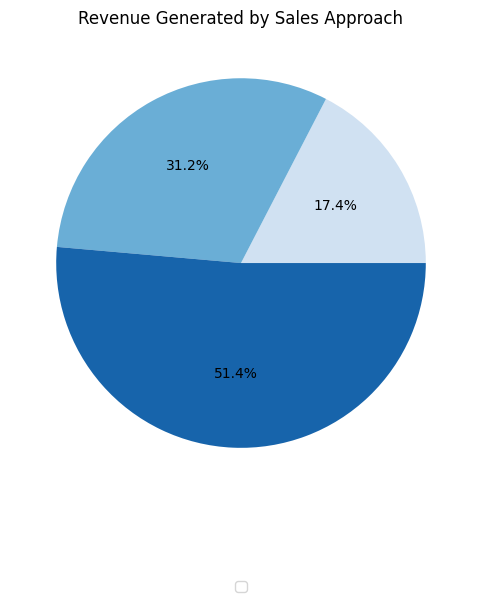

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Get revenue by each sales approach
revenue_by_method = df.groupby('sales_method')['revenue'].sum().sort_values()

# Define shades of blue for each sales method
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(revenue_by_method)))

# Create a pie chart for revenue generated by each sales approach
plt.figure(figsize=(8, 6))
plt.pie(revenue_by_method, labels=None, autopct='%1.1f%%', colors=colors)
plt.title("Revenue Generated by Sales Approach")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3)  # Place legend at the bottom center
plt.show()


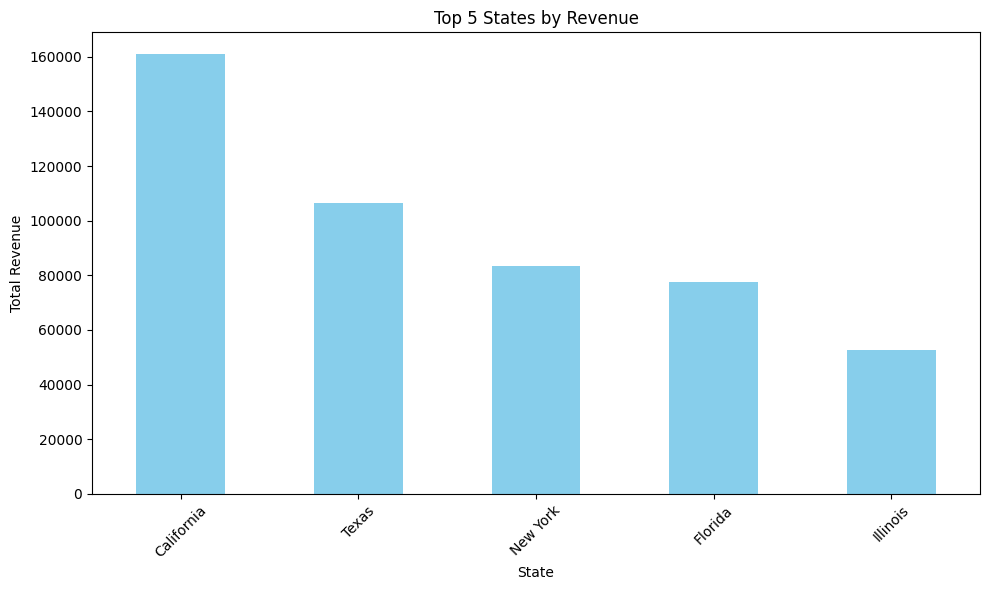

In [63]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'state' and 'revenue'
top_states = df.groupby('state')['revenue'].sum().nlargest(5)  # Selecting top 5 states by total revenue

# Creating the bar chart
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Top 5 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Our analysis revealed that the five states housing the highest customer volumes are California, Texas, New York State, Florida, and Illinois. Collectively, these states generated a revenue sum of $516k.

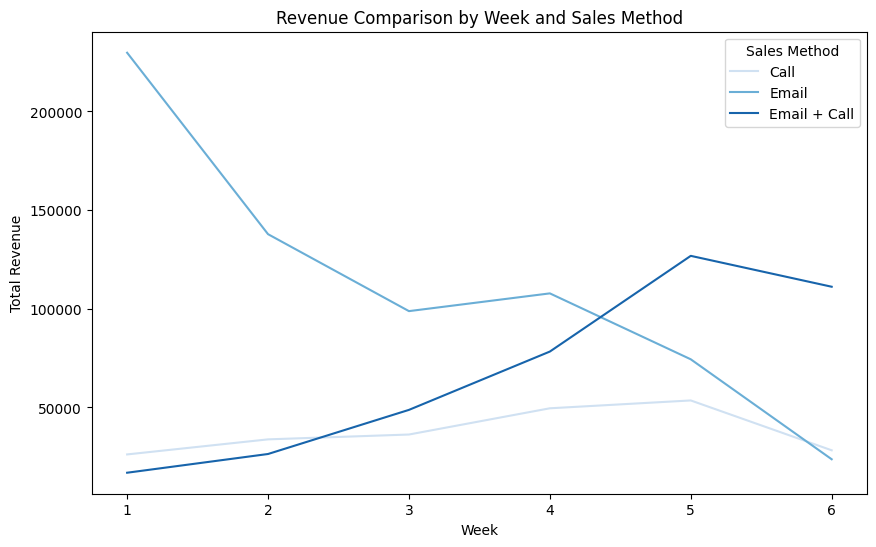

week  sales_method
1     Call             26159.18
      Email           229765.55
      Email + Call     16885.33
2     Call             33792.02
      Email           137794.35
      Email + Call     26376.23
3     Call             36247.27
      Email            98792.14
      Email + Call     48737.14
4     Call             49543.52
      Email           107788.37
      Email + Call     78296.20
5     Call             53518.11
      Email            74373.45
      Email + Call    126809.72
6     Call             28252.92
      Email            23706.75
      Email + Call    111152.07
Name: revenue, dtype: float64


In [64]:
revenue_sum = df.groupby(['week', 'sales_method'])['revenue'].sum()
unstacked = revenue_sum.unstack()

# Plotting the unstacked data
unstacked.plot(kind='line', figsize=(10, 6))
plt.title('Revenue Comparison by Week and Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.show()

print(revenue_sum)



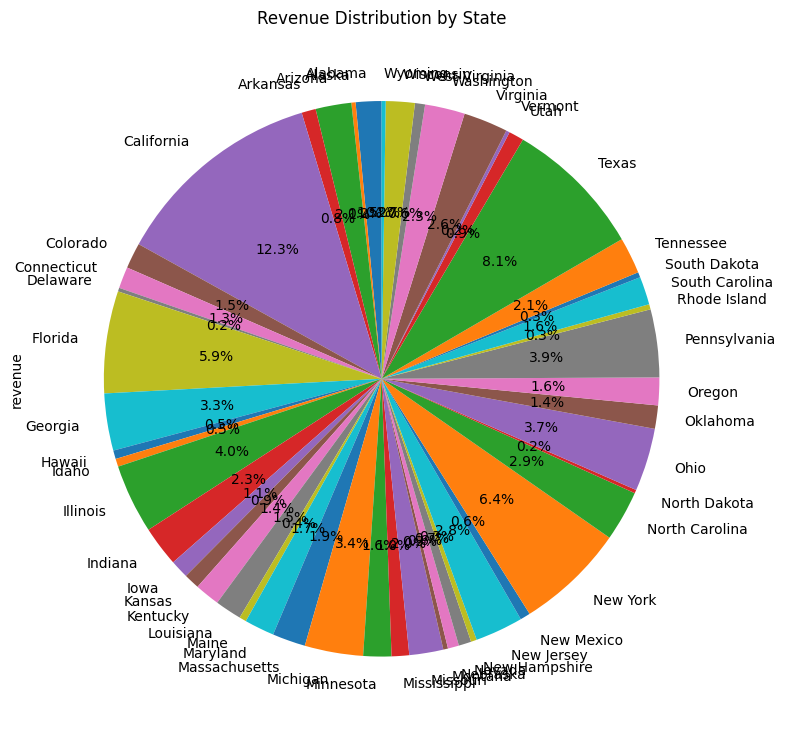

In [65]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'state' and 'revenue'
revenue_by_state = df.groupby('state')['revenue'].sum()

# Selecting top 5 states by total revenue
top_states = revenue_by_state.nlargest(5)

# Plotting a pie chart for revenue by state
plt.figure(figsize=(8, 8))
revenue_by_state.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)

# Adding a title
plt.title('Revenue Distribution by State')

plt.tight_layout()
plt.show()



In [66]:
df

week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]

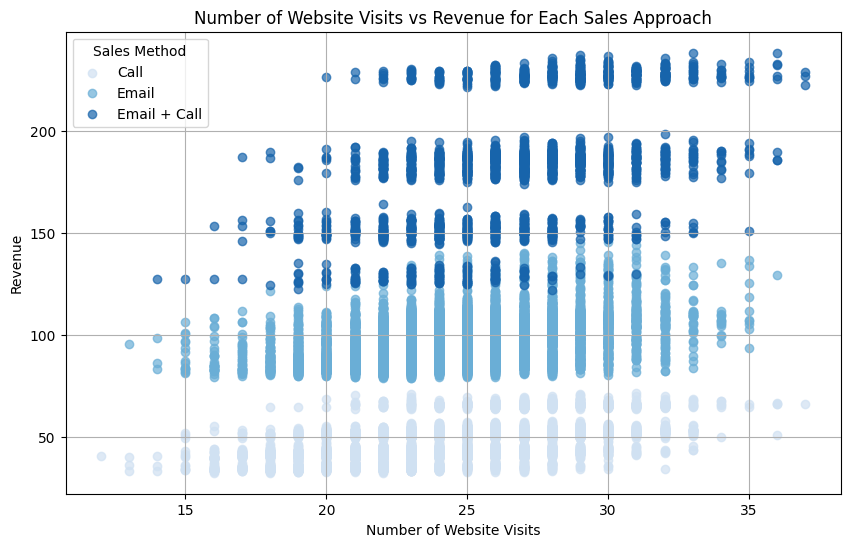

In [67]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the required columns
sales_approach_data = df[['sales_method', 'nb_site_visits', 'revenue']]

# Group the data by sales method and plot scatter graphs
plt.figure(figsize=(10, 6))
for sales_method, data in sales_approach_data.groupby('sales_method'):
    plt.scatter(data['nb_site_visits'], data['revenue'], label=sales_method, alpha=0.7)

# Adding labels and title
plt.title('Number of Website Visits vs Revenue for Each Sales Approach')
plt.xlabel('Number of Website Visits')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.grid(True)

plt.show()


The relationship between the number of site visits and revenue indicates that there's no direct impact on revenue based on the number of visits. Despite varying levels of site visits, the data suggests that revenue remains consistent, signifying that the number of visits alone does not directly influence the revenue generated.

Further analysis demonstrates that the sales method Email + Call consistently generates the highest revenue across all levels of site visits. This implies that, regardless of the number of site visits, this particular sales approach consistently yields the highest revenue compared to other methods.

The graph displays the revenue comparison over weeks for distinct sales methods. Initially, 'Email' sales exhibited a strong start in Week 1 with the highest revenue of £229,765.55, but declined notably by Week 3 to £98,792.14. Conversely, 'Email + Call' began with lower earnings but consistently ascended, becoming the top-performing method by Week 6, reaching £111,152.07. Meanwhile, 'Call' revenue remained relatively modest throughout, ranging between £26,159.18 and £53,518.11. These trends suggest varying effectiveness in sales methods, indicating potential strategies for enhanced performance.

The revenue trends for each sales method vary notabily over the weeks
'Email' method performance has been drastically decreasing week over week (WOW)
'Call' method generally shows lower revenue than other methods
'Email and call' method shows an significant increase WOW, suggesting it might be more effective in generating higher revenue per sale in the future
Based on these insights, a strategic focus on 'Email and call' method for future sales initiatives could be advisable, particularly when aiming to maximize revenue and sales volume
The 'Email and call' method appears to capitalize on the strenghts of both individual sales methods, prividing both reach and personalized engagement, which seems to resonate effectively with customers

In [68]:
df

week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]

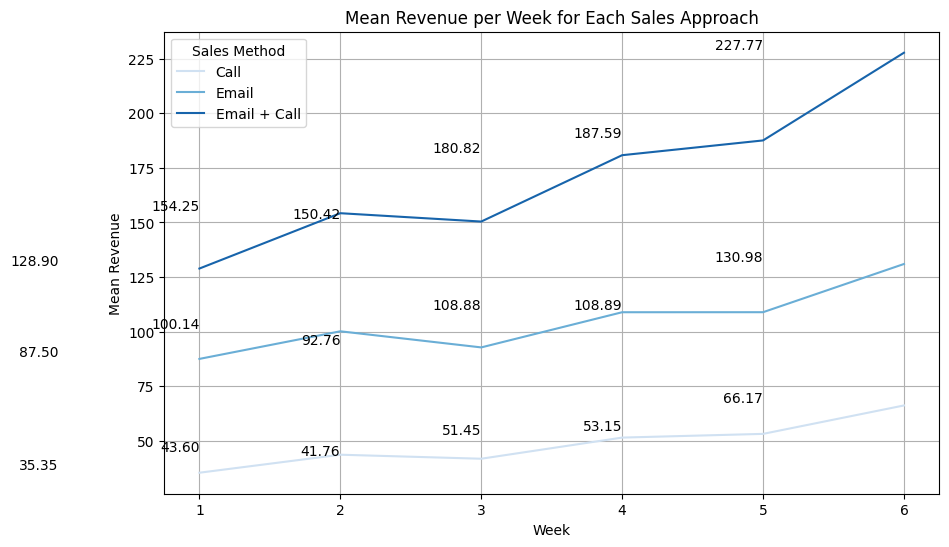

In [69]:
import matplotlib.pyplot as plt

# Assuming you've already calculated mean_revenue_per_week
mean_revenue_per_week = df.groupby(['week', 'sales_method'])['revenue'].mean().unstack()

# Plotting the mean revenue per week for each sales approach
mean_revenue_per_week.plot(kind='line', figsize=(10, 6))
plt.title('Mean Revenue per Week for Each Sales Approach')
plt.xlabel('Week')
plt.ylabel('Mean Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
# Print data points
for col in mean_revenue_per_week.columns:
    for i, val in enumerate(mean_revenue_per_week[col]):
        plt.text(i, val, f'{val:.2f}', ha='right', va='bottom')

plt.show()


In [70]:
mean_revenue = df['revenue'].mean()
print(mean_revenue)


93.93782821028441


In [71]:
# Assuming you've already calculated mean_revenue_per_week

# Create an empty list to store data points
data_points = []

# Iterate through the DataFrame to extract data points
for week, row in mean_revenue_per_week.iterrows():
    for sales_method, revenue in row.items():
        data_points.append((week, sales_method, revenue))

# Print the data points as a list of tuples
print(data_points)


[(1, 'Call', 35.35024324324324), (1, 'Email', 87.49640137090631), (1, 'Email + Call', 128.89564885496185), (2, 'Call', 43.6026064516129), (2, 'Email', 100.14124273255814), (2, 'Email + Call', 154.24695906432748), (3, 'Call', 41.75952764976958), (3, 'Email', 92.76257276995305), (3, 'Email + Call', 150.42327160493826), (4, 'Call', 51.44706126687435), (4, 'Email', 108.8771414141414), (4, 'Email + Call', 180.82263279445726), (5, 'Call', 53.14608738828203), (5, 'Email', 108.89231332357247), (5, 'Email + Call', 187.58834319526628), (6, 'Call', 66.16608899297424), (6, 'Email', 130.97651933701658), (6, 'Email + Call', 227.77063524590164)]


Throughout the six-week analysis, the data consistently depicted revenue trends across the 'Email,' 'Call,' and 'Email + Call' sales methods. Notably, the 'Email + Call' approach maintained the highest mean revenue figures from the beginning, showcasing an ascending trajectory throughout the period. In contrast, 'Call' exhibited the lowest mean revenue, fluctuating between approximately £35.35 and £66.17, displaying a rising trend over the weeks. 'Email' portrayed a relatively steady pattern with figures spanning from £87.50 to £130.98. The robust performance of 'Email + Call' suggested that the combination of personal interaction via calls with the efficiency of emails consistently led to higher customer spending, demonstrating its effectiveness compared to individual approaches.

In [72]:
# Compute average weekly revenue for each sales method
average_weekly_revenue = df.groupby('sales_method')['revenue'].mean().to_frame()

print(average_weekly_revenue)


                 revenue
sales_method            
Call           47.596866
Email          97.127671
Email + Call  183.651233


The data analysis reveals distinct average weekly revenues for each sales method. The 'Call' approach generates approximately £47.60 per week, while the 'Email' method produces around £97.13 weekly. In contrast, the combined 'Email + Call' strategy demonstrates the highest average weekly revenue at roughly £183.65. This indicates that, on average, the 'Email + Call' approach yields the highest weekly revenue among the analyzed sales methods, followed by 'Email' and 'Call,' in that order.

In [73]:
# Compute total customer base for each sales method
Customer_base = df.groupby('sales_method')['customer_id'].nunique().reset_index()
Customer_base.columns = ['Sales Method', 'Total Customers']

print(Customer_base)


   Sales Method  Total Customers
0          Call             4780
1         Email             6921
2  Email + Call             2223


In [74]:
# Compute total Site visited  for each sales method
Site_visit = df.groupby('sales_method')['nb_site_visits'].sum().reset_index()
Site_visit.columns = ['Sales Method', 'Site Visit']

print(Site_visit)


   Sales Method  Site Visit
0          Call      116736
1         Email      171185
2  Email + Call       59440


In [75]:
df

week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]

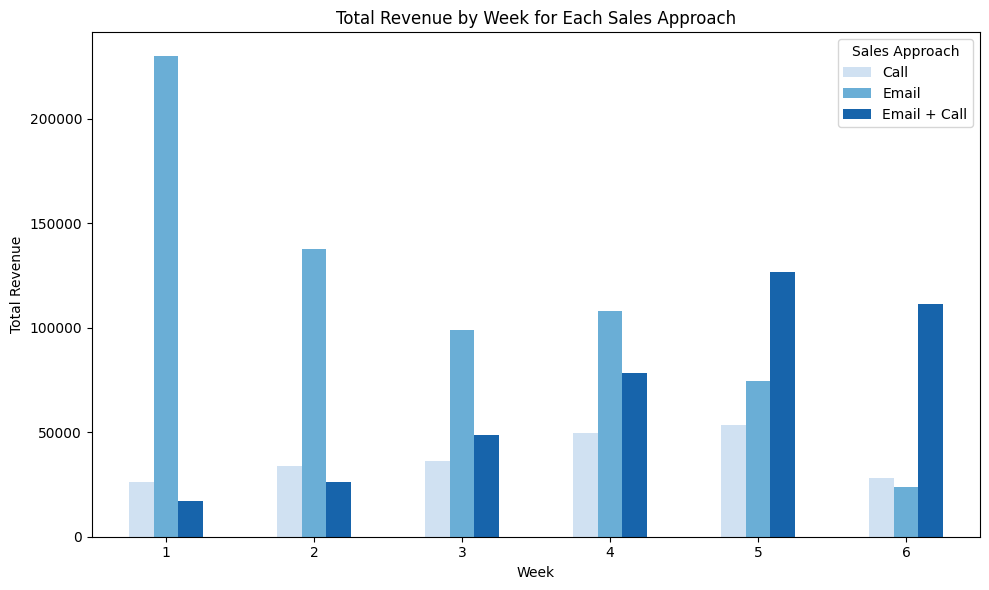

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'Week', 'Sales_Method', and 'Revenue'

# Grouping data by week and sales method to get total revenue for each week and sales approach
revenue_sum = df.groupby(['week', 'sales_method'])['revenue'].sum()
unstacked = revenue_sum.unstack()

# Plotting the unstacked data (Total Revenue by Week for Each Sales Approach)
unstacked.plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Total Revenue by Week for Each Sales Approach')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Approach')
plt.xticks(rotation=0)  # Ensure the week numbers are displayed properly

plt.tight_layout()
plt.show()


In [77]:
# The analysis examined revenue trends among distinct customer groups based on their communication methods. It highlighted that customers in the 'email' group experienced an initial rise in revenue during the product launch in week 1, followed by a decline until a slight increase in week 4, aligning with a subsequent email sent. Meanwhile, the 'call' group consistently maintained lower revenue without a distinct trend. Conversely, the 'email and call' group, receiving an email at launch and a subsequent call, initially displayed lower revenue due to insufficient follow-up time. However, their revenue gradually increased over the initial five weeks, with notable sales in weeks 5 and 6 compared to other groups.

Upon concluding my analysis, I recommend embracing a hybrid marketing strategy. The 'email' segment exhibited the highest overall expenditure, while the 'email + call' group displayed the highest average spending, maintaining this trend in later weeks. To capitalise on these strengths, I propose commencing with an email campaign at launch and subsequently following up with a call around the fourth week for customers who haven't made a purchase. This approach aims to merge the advantages of both strategies, enhancing our overall revenue outcomes.

In [78]:
df

week  sales_method  ... nb_site_visits          state
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]

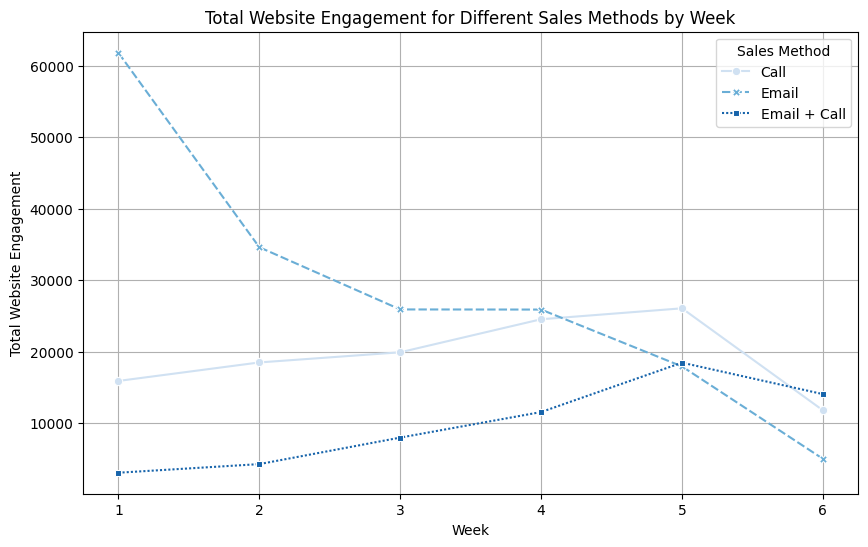

In [79]:
# Remove leading/trailing whitespaces from 'sales_method' column
#engagement_mean = df.groupby(['week', 'sales_method'])['nb_site_visits'].mean().reset_index()
engagement_sum = df.groupby(['week', 'sales_method'])['nb_site_visits'].sum().reset_index()

#engagement_sum['sales_method'] = engagement_sum['sales_method'].str.strip()

# Filter data for three different sales methods
sales_methods = ['Email', 'Call', 'Email + Call']  # Ensure the cases match your data
engagement_filtered = engagement_sum[engagement_sum['sales_method'].isin(sales_methods)]

# Plotting line plot representing total website engagement for different sales methods
plt.figure(figsize=(10, 6))
sns.lineplot(data=engagement_filtered, x='week', y='nb_site_visits', hue='sales_method', style='sales_method', markers=True)
plt.title('Total Website Engagement for Different Sales Methods by Week')
plt.xlabel('Week')
plt.ylabel('Total Website Engagement')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()

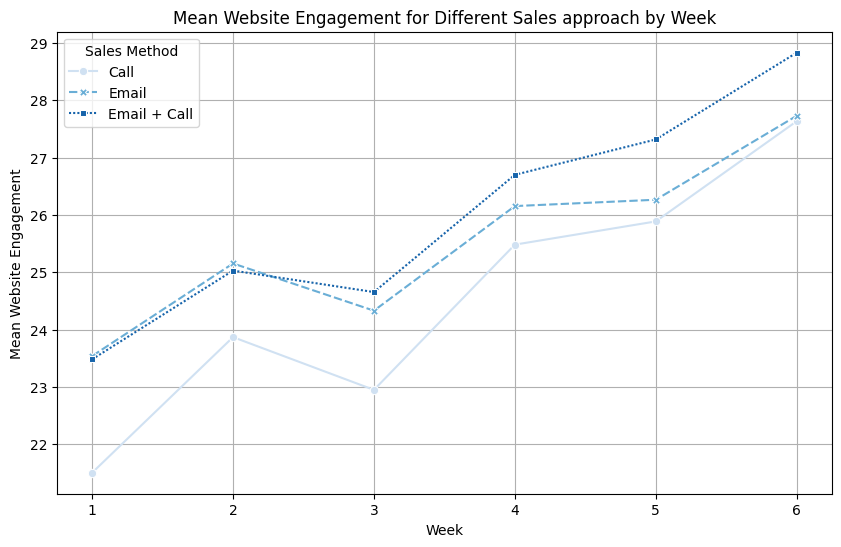

In [80]:
# Group by 'week' and 'sales_method' columns and calculate the mean of site visits
engagement_mean = df.groupby(['week', 'sales_method'])['nb_site_visits'].mean().reset_index()

# Filter data for three different sales methods
sales_methods = ['Email', 'Call', 'Email + Call']  # Ensure the cases match your data
engagement_filtered_mean = engagement_mean[engagement_mean['sales_method'].isin(sales_methods)]

# Plotting line plot representing mean website engagement for different sales methods by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=engagement_filtered_mean, x='week', y='nb_site_visits', hue='sales_method', style='sales_method', markers=True)
plt.title('Mean Website Engagement for Different Sales approach by Week')
plt.xlabel('Week')
plt.ylabel('Mean Website Engagement')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()


The graph demonstrates a notable surge in the mean website engagement during the first two weeks, followed by a decline in the third week. However, subsequent to the third week, when customers were contacted through email and calls, there was a noticeable rise in the mean website engagement. This pattern indicates that direct interaction with customers resulted in an increase in the mean website engagement.

While the mean website engagement increased across all three sales approaches, the total website engagement for the 'email + call' sales approach notably decreased. Conversely, for the 'call' and 'email' approaches, there was a slight increment in mean website engagement over the six-week period

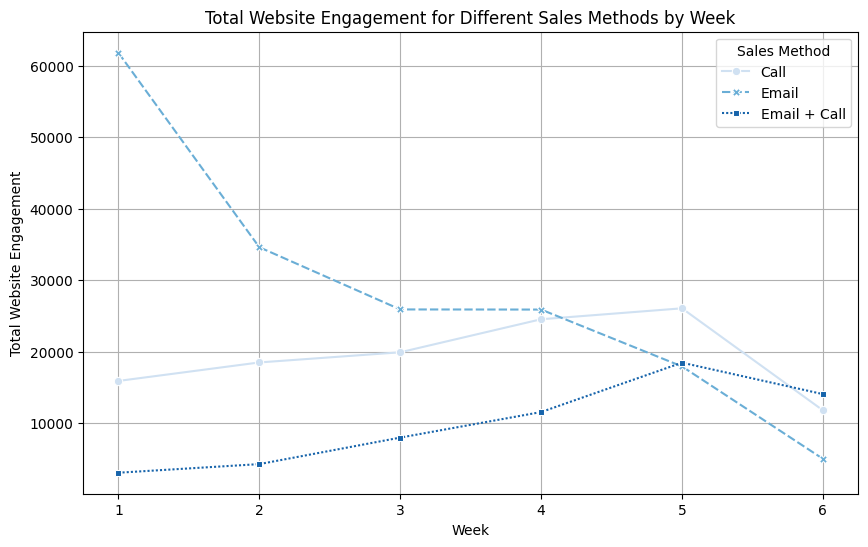

In [81]:
# Group by 'week' and 'sales_method' columns and calculate the mean of site visits
engagement_mean = df.groupby(['week', 'sales_method'])['nb_site_visits'].sum().reset_index()

# Filter data for three different sales methods
sales_methods = ['Email', 'Call', 'Email + Call']  # Ensure the cases match your data
engagement_filtered_mean = engagement_mean[engagement_mean['sales_method'].isin(sales_methods)]

# Plotting line plot representing mean website engagement for different sales methods by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=engagement_filtered_mean, x='week', y='nb_site_visits', hue='sales_method', style='sales_method', markers=True)
plt.title('Total Website Engagement for Different Sales Methods by Week')
plt.xlabel('Week')
plt.ylabel('Total Website Engagement')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()


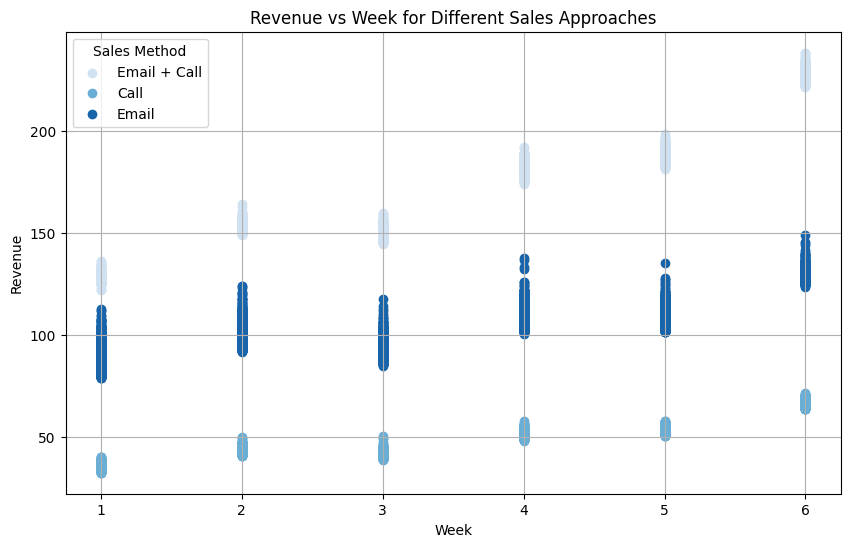

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
# Filter the data for the three different sales methods
sales_methods = ['Email + Call', 'Call', 'Email']
filtered_data = df[df['sales_method'].isin(sales_methods)]

# Plotting scatter plot for revenue vs week for each sales approach
plt.figure(figsize=(10, 6))

for method in sales_methods:
    method_data = filtered_data[filtered_data['sales_method'] == method]
    plt.scatter(method_data['week'], method_data['revenue'], label=method)

plt.title('Revenue vs Week for Different Sales Approaches')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()


The revenue trend week over week showcases the consistent dominance of the Email + Call sales method as the top performer, consistently generating higher revenue per sale across the observed period.







In [83]:
#Definition of a metric for the business to monitor  

In [84]:
# Create a pivot table for mean, median, and maximum revenue across each sales approach and week

#pivot_mean_median_max_revenue = df.pivot_table(values='revenue', index='week', columns='sales_method', aggfunc=['mean', 'median', 'max'])

#print(pivot_mean_median_max_revenue)


# Create a pivot table for both mean and median revenue across each sales approach and week
pivot_mean_median_revenue = df.pivot_table(values='revenue', index='week', columns='sales_method', aggfunc=['mean', 'median'])

print(pivot_mean_median_revenue)


                   mean                           median                      
sales_method       Call       Email Email + Call    Call    Email Email + Call
week                                                                          
1             35.350243   87.496401   128.895649  35.195   86.535      128.720
2             43.602606  100.141243   154.246959  43.460   99.250      154.170
3             41.759528   92.762573   150.423272  41.470   91.800      149.930
4             51.447061  108.877141   180.822633  51.270  108.090      180.550
5             53.146087  108.892313   187.588343  52.970  108.020      187.195
6             66.166089  130.976519   227.770635  65.970  130.450      227.405


The pivot table displaying the mean and median revenue across different sales methods for each week provides insightful trends. It reveals the average and middle revenue values per week for each sales approach:

Observing the trends, 'Email + Call' consistently demonstrated the highest mean and median revenue figures across all weeks, indicating its strong performance. Following this approach, 'Email' showcased the second-highest revenue, while 'Call' consistently remained at the lowest end.








In [85]:
Revenue_mean = df.groupby('sales_method')['revenue'].mean().reset_index()
Revenue_mean.columns = ['Sales Method', 'revenue']
print(Revenue_mean)

   Sales Method     revenue
0          Call   47.596866
1         Email   97.127671
2  Email + Call  183.651233


The recommendation is to adopt a hybrid marketing approach by emphasising the 'Email and call' method while discontinuing the 'call' sales approach due to its lower revenue returns despite its sales share. To enhance analysis, it's advised to improve data collection, monitor unsuccessful sales attempts, and track the duration of customer phone calls for deeper insights. Understanding that effort varies among methods, balancing effort and outcomes is crucial. Despite the higher effort of the 'Email and call' method, its increased revenue and engagement, especially among high-value customers, justify the additional time investment. The consistent higher revenue and sales volume produced by the 'Email and call' approach strengthen the focus on this method, leveraging its personalised engagement and wider reach. Notably, this method excels in median revenue generation and demonstrates a positive trend in revenue week after week, indicating improving efficacy over time, which forecasts sustained success.

Metric: Conversion Rate

Definition: Conversion Rate quantifies successful conversions (like completed purchases) attributed to specific sales approaches (call, email, email + call) in relation to the total corresponding visitors within a defined period.

Usage: Essential for evaluating the effectiveness of sales approaches in transforming leads into customers. It guides decisions on resource allocation and process improvement.

Insights: Higher Conversion Rates highlight superior engagement and efficacy in converting leads into customers. Lower rates indicate areas needing optimization or enhancement in the sales process.

Recommendations

Prioritize Email + Call: Based on revenue performance and customer impact, focus on the Email + Call approach to optimize sales and engagement.

Implement Robust Follow-Up Strategies: Enhance follow-up mechanisms, especially through emails, to nurture customer relationships and boost long-term revenue gains.

A/B Testing for Sales Approaches: Introduce A/B testing across different sales strategies (calls, emails, combined strategies) to refine subject lines, content, timing, and call scripts for enhanced effectiveness.

Tailored Marketing for Top States: Invest resources in tailored marketing strategies for high-revenue states (California, Texas, New York State, Florida, and Illinois) to sustain and potentially increase revenue generation.

Summary
Examined sales data for six weeks following the launch of a new product line in a well-established office products company.
Analyzed the impact of different sales strategies on revenue and market penetration.
Identified evolving market demands despite increasing digital trends.
Sales Methodologies:

Email, Call, and Email + Call methods analysed.
Email method contributed 51% of total revenue, while Email + Call generated 31.2% despite having a smaller customer base.
Recommendations and Impact:

Recommended strategies: Discontinue Call, prioritize Email + Call, and implement robust follow-up measures.
Impacts include increased sales, conversion rates, and a higher return on marketing investment.
Customer Distribution and Revenue Breakdown:

Customer distribution by sales approach highlighted Email as the most significant in sales volume.
Revenue analysis showed Email + Call with the highest median revenue.
Website Engagement and State-wise Revenue Contributions:

Mean website engagement trends revealed fluctuation, suggesting the need for better follow-up strategies.
Identified top states contributing to 36.7% of overall revenue, recommending tailored marketing strategies.
Conversion Rate Forecast:

Defined Conversion Rate and forecasted additional revenue by enhancing the conversion rate from the current 3%.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation